In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

###Download datasest

In [ ]:
#install to download the dataset easily
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
#download dataset
!gdown 18wEiRTNkFRp5Xlt1pvtw8q7Me_lENX21

Downloading...
From: https://drive.google.com/uc?id=18wEiRTNkFRp5Xlt1pvtw8q7Me_lENX21
To: /content/Dental.rar
100% 40.1M/40.1M [00:02<00:00, 16.3MB/s]


In [ ]:
#unzip dataset
!unrar x "/content/Dental.rar" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Dental.rar

Creating    Dental                                                    OK
Creating    Dental/Argon                                              OK
Extracting  Dental/Argon/1252.PNG                                          0%  OK 
Extracting  Dental/Argon/170861378_181773640455697_8868278685022032298_n_03.jpg       0%  OK 
Extracting  Dental/Argon/170997132_181773687122359_801184412197855815_n_03.jpg       0%  OK 
Extracting  Dental/Argon/172042944_181773760455685_5660686353046769448_n_03.jpg       0%  OK 
Extracting  Dental/Argon/2123.PNG                                          0%  OK 
Extracting  Dental/Argon/215339849_1394213794283356_2287391585413002973_n_03.jpg       0%  OK 
Extracting  Dental/Argon/215339849_1394213794283356_2287391585413002973_n_06.jpg       0%  OK 
Extracting  Dental/Argon/215339849_1394213794283

###Explore dataset

(383, 246, 3)


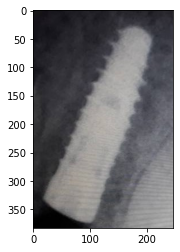

In [ ]:
# Read and plot image 
def read_and_display(image):
    image = plt.imread(image)
    plt.imshow(image)
    print(image.shape)
    
read_and_display("/content/Dental/Biomet3i/22406019_1904919493106345_55657782152658233_n.jpg")

In [ ]:
source = '/content/Dental'

print("Number of classes = ", len(os.listdir(source)))

Number of classes =  60


In [ ]:
#number of images per class
n_images_list = []

for f in os.listdir(source):  
    images = os.listdir(os.path.join(source, f))
    n_images = len(images)
    n_images_list.append(n_images)
    print(f, "--->", n_images)

Isomed ---> 21
osteocare ---> 1
Neoss ---> 38
BRAT ---> 34
bego ---> 7
Neobiotech ---> 39
Dentis ---> 81
Argon ---> 43
Ritter ---> 50
Vitronex ---> 58
ROOTT ---> 49
Straumann ---> 50
Root ---> 14
C-tech ---> 39
JDentalCare ---> 37
Megagen ---> 39
Dentaurum ---> 6
Nuvo ---> 5
Hiossen ---> 85
Nucleoss ---> 38
Shutz ---> 33
Bilimplant ---> 63
BioHorizons ---> 71
SIC ---> 55
BTK ---> 41
mode ---> 2
DTI ---> 23
Astratech ---> 30
ETK ---> 94
Dentegris ---> 24
TUT ---> 34
FMD ---> 6
NDI ---> 29
B&B Dental ---> 41
Zimmer ---> 45
Medibrex ---> 13
Blue Sky Bio ---> 40
Implant-Direct ---> 3
Green ---> 58
Klockner ---> 11
Humana ---> 3
Biomet3i ---> 47
Bredent ---> 31
PTI ---> 68
biodem ---> 38
Detech ---> 86
Oxy ---> 2
Dual ---> 25
Humantech ---> 38
BioInfinity Implant ---> 40
Neodent ---> 8
General ---> 21
solvo ---> 45
Dentium ---> 37
Flotechno ---> 60
Bicon ---> 149
Medisolaris ---> 19
Chaoram ---> 127
SGS ---> 68
Calcitach ---> 1


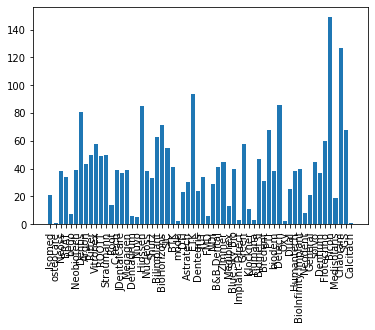

In [ ]:
plt.bar(os.listdir(source),n_images_list)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import shutil
source = '/content/Dental'
n_images_list = []

for f in os.listdir(source):  
    images = os.listdir(os.path.join(source, f))
    n_images = len(images)
    if n_images < 25: 
        n_images_list.append(n_images)
        shutil.rmtree(os.path.join(source, f), ignore_errors=True)
    else:
      n_images_list.append(n_images)

print("Number of classes after del = ", len(os.listdir(source)))

Number of classes after del =  41


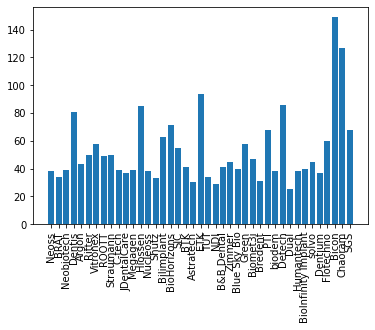

In [ ]:
plt.bar(os.listdir(source),n_images_list)
plt.xticks(rotation=90)
plt.show()

In [ ]:
classes_list = os.listdir(source)
print(classes_list)
num_classes = len(classes_list)

['Neoss', 'BRAT', 'Neobiotech', 'Dentis', 'Argon', 'Ritter', 'Vitronex', 'ROOTT', 'Straumann', 'C-tech', 'JDentalCare', 'Megagen', 'Hiossen', 'Nucleoss', 'Shutz', 'Bilimplant', 'BioHorizons', 'SIC', 'BTK', 'Astratech', 'ETK', 'TUT', 'NDI', 'B&B Dental', 'Zimmer', 'Blue Sky Bio', 'Green', 'Biomet3i', 'Bredent', 'PTI', 'biodem', 'Detech', 'Dual', 'Humantech', 'BioInfinity Implant', 'solvo', 'Dentium', 'Flotechno', 'Bicon', 'Chaoram', 'SGS']


### Train/valid/test split

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
# Split with a ratio.
splitfolders.ratio("/content/Dental", output="/content/data", 
                   seed=816, ratio=(.85, .075, .075), 
                   group_prefix=None)

Copying files: 2173 files [00:00, 5987.54 files/s]


### Create dataset generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        # rotation_range=45,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        # horizontal_flip=True,
        fill_mode='nearest')  

In [ ]:
batch_size = 64
img_height = 224
img_width = 224
image_size = (img_height, img_width)

In [ ]:
train_dir = '/content/data/train'
train_generator=datagen.flow_from_directory(
                        directory=train_dir,
                        batch_size=batch_size,
                        seed=50,
                        shuffle=True,
                        class_mode="categorical",
                        color_mode="rgb",
                        target_size=image_size)

Found 1828 images belonging to 41 classes.


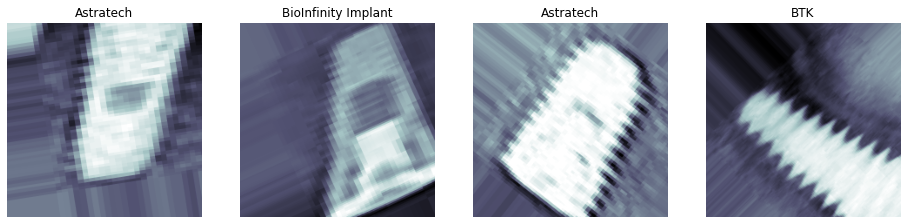

In [ ]:
#with data augmentation
def plotImagesAndLabels():
    t_x, t_y = next(train_generator)
    fig, m_axs = plt.subplots(1, 4, figsize = (16, 16))
    for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
        c_ax.imshow(c_x[:,:,0], cmap = 'bone')
        c_ax.set_title(', '.join([n_class for n_class, n_score in zip(classes_list, c_y) 
                                 if n_score>0.5]))
        c_ax.axis('off')
plotImagesAndLabels()

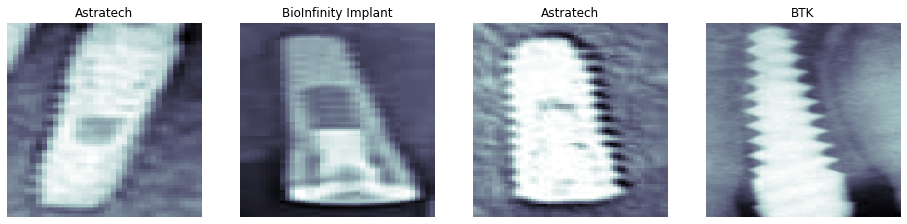

In [ ]:
#w/o data augmentation
def plotImagesAndLabels():
    t_x, t_y = next(train_generator)
    fig, m_axs = plt.subplots(1, 4, figsize = (16, 16))
    for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
        c_ax.imshow(c_x[:,:,0], cmap = 'bone')
        c_ax.set_title(', '.join([n_class for n_class, n_score in zip(classes_list, c_y) 
                                 if n_score>0.5]))
        c_ax.axis('off')
plotImagesAndLabels()

In [ ]:
val_dir = '/content/data/val'
valid_generator=datagen.flow_from_directory(
                        directory=val_dir,
                        batch_size=batch_size,
                        seed=42,
                        shuffle=True,
                        class_mode="categorical",
                        color_mode="rgb",
                        target_size=image_size)

Found 144 images belonging to 41 classes.


In [ ]:
test_dir = '/content/data/test'
test_generator=datagen.flow_from_directory(
                            directory=test_dir,
                            batch_size=1,
                            seed=42,
                            shuffle=False,
                            class_mode="categorical",
                            color_mode="rgb",
                            target_size=image_size)

Found 201 images belonging to 41 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.layers import Input, AveragePooling2D, GlobalAveragePooling2D,  Activation,concatenate
from tensorflow.keras import layers
import cv2
import tensorflow_hub as hub
import tensorflow as tf

## Resnet50 pretrained model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

inputs = Input((img_height, img_width, 3))
resnet_model_backbone = ResNet50(
    input_tensor=inputs,
    weights = 'imagenet', 
    include_top = False 
)

resnet_model_backbone.trainable = False
x = resnet_model_backbone.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)

resnet_model = Model(inputs, x)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
resnet_model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

###W/o data augmentation

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

filepath="/content/" + "resnet_weights_t3.h5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
callbacks_list = [checkpoint, es]


In [ ]:
resnet_history = resnet_model.fit(
                    train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    epochs=50,
                    shuffle = True, 
                    callbacks=callbacks_list)

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 3.2793 - accuracy: 0.2205 
Epoch 1: val_loss improved from inf to 2.56078, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 347s 12s/step - loss: 3.2793 - accuracy: 0.2205 - val_loss: 2.5608 - val_accuracy: 0.3611
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 2.0194 - accuracy: 0.4546 
Epoch 2: val_loss improved from 2.56078 to 2.06487, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 337s 12s/step - loss: 2.0194 - accuracy: 0.4546 - val_loss: 2.0649 - val_accuracy: 0.4653
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 1.4595 - accuracy: 0.6023 
Epoch 3: val_loss improved from 2.06487 to 2.02460, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 337s 12s/step - loss: 1.4595 - accuracy: 0.6023 - val_loss: 2.0246 - val_accuracy: 0.4722
Epoch 4/50
29/29 [====================

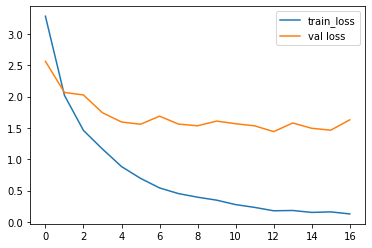

In [ ]:
# Plot the Loss
plt.plot(resnet_history.history['loss'], label = 'train_loss')
plt.plot(resnet_history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

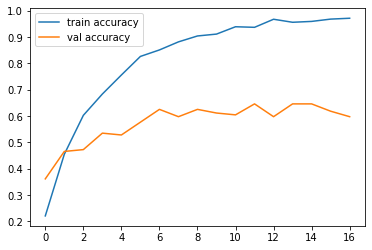

In [ ]:
# Plot the Accuracy
plt.plot(resnet_history.history['accuracy'], label = 'train accuracy')
plt.plot(resnet_history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

### With data augmentation

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

filepath="/content/" + "resnet_weights_t1.h5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
callbacks_list = [checkpoint, es]


In [ ]:
resnet_history = resnet_model.fit(
                    train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    epochs=50,
                    shuffle = True, 
                    callbacks=callbacks_list)

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 3.6676 - accuracy: 0.1329 
Epoch 1: val_loss improved from inf to 3.11699, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 366s 12s/step - loss: 3.6676 - accuracy: 0.1329 - val_loss: 3.1170 - val_accuracy: 0.1944
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 2.8414 - accuracy: 0.2489 
Epoch 2: val_loss improved from 3.11699 to 2.90308, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 362s 13s/step - loss: 2.8414 - accuracy: 0.2489 - val_loss: 2.9031 - val_accuracy: 0.2292
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 2.5393 - accuracy: 0.3299 
Epoch 3: val_loss improved from 2.90308 to 2.63439, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 357s 12s/step - loss: 2.5393 - accuracy: 0.3299 - val_loss: 2.6344 - val_accuracy: 0.2708
Epoch 4/50
29/29 [====================

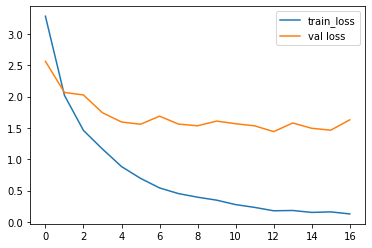

In [ ]:
# Plot the Loss
plt.plot(resnet_history.history['loss'], label = 'train_loss')
plt.plot(resnet_history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

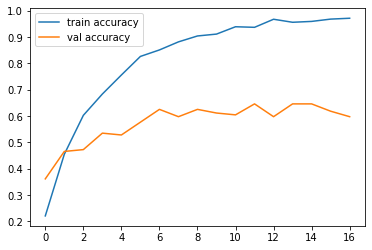

In [ ]:
# Plot the Accuracy
plt.plot(resnet_history.history['accuracy'], label = 'train accuracy')
plt.plot(resnet_history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

##Resnet50 model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

inputs = Input((img_height, img_width, 3))
resnet_model_backbone = ResNet50(
    input_tensor=inputs,
    include_top = False 
)

resnet_model_backbone.trainable = False
x = resnet_model_backbone.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)

resnet_model = Model(inputs, x)

In [ ]:
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
resnet_model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

###W/o data augmentation

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

filepath="/content/" + "resnet_weights_t2.h5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
callbacks_list = [checkpoint, es]


In [ ]:
resnet_history = resnet_model.fit(
                    train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    epochs=50,
                    shuffle = True, 
                    callbacks=callbacks_list)

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 3.3424 - accuracy: 0.1942 
Epoch 1: val_loss improved from inf to 2.50071, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 351s 12s/step - loss: 3.3424 - accuracy: 0.1942 - val_loss: 2.5007 - val_accuracy: 0.4028
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 2.0450 - accuracy: 0.4519 
Epoch 2: val_loss improved from 2.50071 to 2.15562, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 325s 11s/step - loss: 2.0450 - accuracy: 0.4519 - val_loss: 2.1556 - val_accuracy: 0.4167
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 1.5395 - accuracy: 0.5700 
Epoch 3: val_loss improved from 2.15562 to 1.93938, saving model to /content/alexnet_weights.h5
29/29 [==============================] - 347s 12s/step - loss: 1.5395 - accuracy: 0.5700 - val_loss: 1.9394 - val_accuracy: 0.5208
Epoch 4/50
29/29 [====================

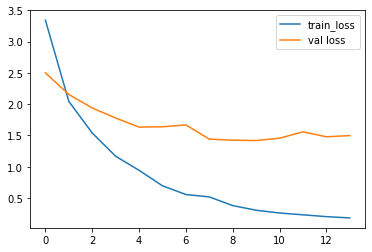

In [ ]:
# Plot the Loss
plt.plot(resnet_history.history['loss'], label = 'train_loss')
plt.plot(resnet_history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

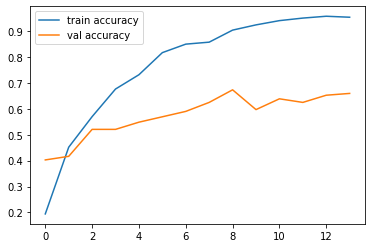

In [ ]:
# Plot the Accuracy
plt.plot(resnet_history.history['accuracy'], label = 'train accuracy')
plt.plot(resnet_history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

###With data augmentation

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

filepath="/content/" + "resnet_weights_t4.h5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
callbacks_list = [checkpoint, es]


In [ ]:
resnet_history = resnet_model.fit(
                    train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    epochs=50,
                    shuffle = True, 
                    callbacks=callbacks_list)

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 3.5673 - accuracy: 0.1346 
Epoch 1: val_loss improved from inf to 3.01166, saving model to /content/resnet_weights_t4.h5
29/29 [==============================] - 353s 12s/step - loss: 3.5673 - accuracy: 0.1346 - val_loss: 3.0117 - val_accuracy: 0.1806
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 2.7790 - accuracy: 0.2697 
Epoch 2: val_loss improved from 3.01166 to 2.83209, saving model to /content/resnet_weights_t4.h5
29/29 [==============================] - 347s 12s/step - loss: 2.7790 - accuracy: 0.2697 - val_loss: 2.8321 - val_accuracy: 0.2778
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 2.5588 - accuracy: 0.3151 
Epoch 3: val_loss improved from 2.83209 to 2.70693, saving model to /content/resnet_weights_t4.h5
29/29 [==============================] - 346s 12s/step - loss: 2.5588 - accuracy: 0.3151 - val_loss: 2.7069 - val_accuracy: 0.2778
Epoch 4/50
29/29 [==============

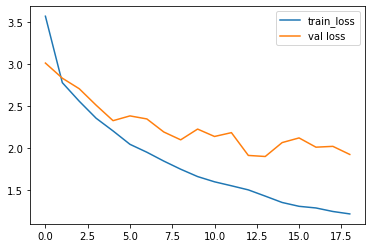

In [ ]:
# Plot the Loss
plt.plot(resnet_history.history['loss'], label = 'train_loss')
plt.plot(resnet_history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

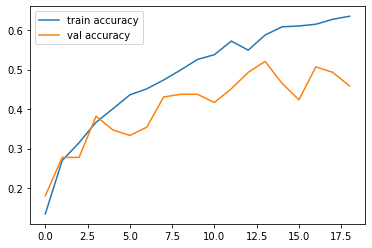

In [ ]:
# Plot the Accuracy
plt.plot(resnet_history.history['accuracy'], label = 'train accuracy')
plt.plot(resnet_history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

##Simple model

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [ ]:
model = ResNet18(num_classes)
model.build(input_shape=(None, img_height, img_width, 3))
model.compile(optimizer="adam",
              loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "res_net18_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          multiple                  9472      
                                                                 
 batch_normalization_60 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 resnet_block_24 (ResnetBloc  multiple                 74368     
 k)                                                              
                                                                 
 resnet_block_25 (ResnetBloc  multiple                 74368     
 k)                                                    

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
callbacks_list = [es]


In [ ]:
resnet_history = model.fit(
                    train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    epochs=50,
                    shuffle = True, 
                    callbacks=callbacks_list)

Epoch 1/50
29/29 [==============================] - 536s 18s/step - loss: 3.8667 - accuracy: 0.0881 - val_loss: 138.9004 - val_accuracy: 0.0208
Epoch 2/50
29/29 [==============================] - 538s 19s/step - loss: 3.0756 - accuracy: 0.1964 - val_loss: 53.5012 - val_accuracy: 0.0208
Epoch 3/50
29/29 [==============================] - 537s 19s/step - loss: 2.8144 - accuracy: 0.2637 - val_loss: 20.9935 - val_accuracy: 0.0208
Epoch 4/50
29/29 [==============================] - 536s 18s/step - loss: 2.5655 - accuracy: 0.3074 - val_loss: 16.6762 - val_accuracy: 0.0417
Epoch 5/50
29/29 [==============================] - 535s 18s/step - loss: 2.2380 - accuracy: 0.3835 - val_loss: 11.2230 - val_accuracy: 0.0347
Epoch 6/50
29/29 [==============================] - 536s 18s/step - loss: 2.0880 - accuracy: 0.4218 - val_loss: 10.0995 - val_accuracy: 0.0347
Epoch 7/50
29/29 [==============================] - 530s 18s/step - loss: 1.8064 - accuracy: 0.4923 - val_loss: 11.1567 - val_accuracy: 0.006

In [ ]:
model.save("res18")

In [ ]:
!zip -r '/content/res18.zip' '/content/res18'

  adding: content/res18/ (stored 0%)
  adding: content/res18/saved_model.pb (deflated 92%)
  adding: content/res18/keras_metadata.pb (deflated 94%)
  adding: content/res18/assets/ (stored 0%)
  adding: content/res18/variables/ (stored 0%)
  adding: content/res18/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/res18/variables/variables.index (deflated 79%)


##Evaluate models

In [ ]:
from keras.models import load_model
model1 = load_model('/content/resnet_weights_t1.h5')
model2 = load_model('/content/resnet_weights_t2.h5') 
model3 = load_model('/content/resnet_weights_t3.h5') 
model4 = load_model('/content/resnet_weights_t4.h5') 

In [ ]:
test1_loss, test1_accuracy = model1.evaluate(test_generator, steps=len(test_generator))
print("Test loss = ", test1_loss)
print("Test accuracy = ", test1_accuracy*100, "%")

201/201 [==============================] - 55s 273ms/step - loss: 6.9186 - accuracy: 0.0299
Test loss =  6.918556213378906
Test accuracy =  2.985074557363987 %


In [ ]:
test2_loss, test2_accuracy = model2.evaluate(test_generator, steps=len(test_generator))
print("Test loss = ", test2_loss)
print("Test accuracy = ", test2_accuracy*100, "%")

201/201 [==============================] - 47s 228ms/step - loss: 6.7835 - accuracy: 0.0398
Test loss =  6.783500671386719
Test accuracy =  3.9800994098186493 %


In [ ]:
test3_loss, test3_accuracy = model3.evaluate(test_generator, steps=len(test_generator))
print("Test loss = ", test3_loss)
print("Test accuracy = ", test3_accuracy*100, "%")

201/201 [==============================] - 46s 221ms/step - loss: 7.5348 - accuracy: 0.0398
Test loss =  7.534761428833008
Test accuracy =  3.9800994098186493 %


In [ ]:
test4_loss, test4_accuracy = model4.evaluate(test_generator, steps=len(test_generator))
print("Test loss = ", test4_loss)
print("Test accuracy = ", test4_accuracy*100, "%")

201/201 [==============================] - 46s 222ms/step - loss: 6.0849 - accuracy: 0.0547
Test loss =  6.084949970245361
Test accuracy =  5.472636967897415 %


In [ ]:
from sklearn.metrics import classification_report

predict = model3.predict(test_generator,steps = 201)
y_pred = np.argmax(predict, axis=1)
y_test = test_generator.labels
print(classification_report(y_test, y_pred))

201/201 [==============================] - 45s 212ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.08      0.08      0.08        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         4
          16       0.00

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_labels=test_generator.labels # is a sequential list  of test labels for each image sample
class_dict= test_generator.class_indices # a dictionary where key is the class name and value is the corresponding label for the class
print (class_dict) # have a look at the dictionary
new_dict={} 
for key in class_dict: # set key in new_dict to value in class_dict and value in new_dict to key in class_dict
    value=class_dict[key]
    new_dict[value]=key
print('PREDICTED CLASS  TRUE CLASS       FILENAME ' ) # adjust spacing based on your class names
for i, p in enumerate(predict):
    pred_index=np.argmax(p) # get the index that has the highest probability
    print(pred_index)
    pred_class=new_dict[pred_index]  # find the predicted class based on the index
    true_class=new_dict[test_labels[i]] # use the test label to get the true class of the test file
    print(f'    {pred_class}       {true_class}')

{'Argon': 0, 'Astratech': 1, 'B&B Dental': 2, 'BRAT': 3, 'BTK': 4, 'Bicon': 5, 'Bilimplant': 6, 'BioHorizons': 7, 'BioInfinity Implant': 8, 'Biomet3i': 9, 'Blue Sky Bio': 10, 'Bredent': 11, 'C-tech': 12, 'Chaoram': 13, 'Dentis': 14, 'Dentium': 15, 'Detech': 16, 'Dual': 17, 'ETK': 18, 'Flotechno': 19, 'Green': 20, 'Hiossen': 21, 'Humantech': 22, 'JDentalCare': 23, 'Megagen': 24, 'NDI': 25, 'Neobiotech': 26, 'Neoss': 27, 'Nucleoss': 28, 'PTI': 29, 'ROOTT': 30, 'Ritter': 31, 'SGS': 32, 'SIC': 33, 'Shutz': 34, 'Straumann': 35, 'TUT': 36, 'Vitronex': 37, 'Zimmer': 38, 'biodem': 39, 'solvo': 40}
PREDICTED CLASS  TRUE CLASS       FILENAME 
18
    ETK       Argon
18
    ETK       Argon
18
    ETK       Argon
18
    ETK       Argon
18
    ETK       Astratech
18
    ETK       Astratech
18
    ETK       Astratech
18
    ETK       B&B Dental
18
    ETK       B&B Dental
18
    ETK       B&B Dental
18
    ETK       B&B Dental
5
    Bicon       BRAT
18
    ETK       BRAT
18
    ETK       BRAT
18
    